In [19]:
import os
import rasterio
import numpy as np

# Input directory containing subfolders with TIFF images
input_directory = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\filtered_patches_GEE"

# Output directory to save the modified TIFF images
output_directory = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\filtered_patches_GEE_3_bands"

# Iterate over the subfolders and files in the input directory
for root, dirs, files in os.walk(input_directory):
    for file in files:
        if file.endswith('.tif'):
            # Construct the input and output file paths
            input_path = os.path.join(root, file)
            output_path = os.path.join(output_directory, os.path.relpath(root, input_directory), os.path.splitext(file)[0] + '.png')
            
            # Create the output directory if it doesn't exist
            os.makedirs(os.path.dirname(output_path), exist_ok=True)
            
            # Open the input TIFF file
            with rasterio.open(input_path) as src:
                # Read the desired bands (e.g., bands 1, 2, and 3)
                bands = src.read([2, 3, 4])
                
                # Copy the metadata from the source dataset
                meta = src.meta
                
                # Normalize the pixel values between 0 and 255
                bands = np.interp(bands, (bands.min(), bands.max()), (0, 255)).astype(np.uint8)
                
                # Write the modified bands to the output TIFF file
                with rasterio.open(output_path, 'w', driver='PNG', count=3, width=bands.shape[2], height=bands.shape[1], dtype='uint8',) as dst:
                    dst.write(bands)

In [6]:
im = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\filtered_patches_GEE_3_bands\11\sentinel2_images_mean_2019-04-01_to_2019-05-01-0000000000-0000000000index_49410_station_110_label_DBL_phase_id_11.png"
from rasterio.plot import show


3


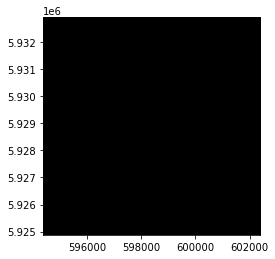

In [8]:
with rasterio.open(im) as src:
    print(src.count)
    show(src)